In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from histograms import fit_pedestal, make_histogram, subtract_pedestal
from file_utils import load_image
from matplotlib.colors import LogNorm
from hit_detection import get_hot_pixels

# Load an image
img = load_image("data/images/image8.npy")
bin_centres, hist_data = make_histogram(img, 100)

# Fit and subtract the pedestal
pedestal_params, _ = fit_pedestal(bin_centres, hist_data)
img = subtract_pedestal(img, pedestal_params)

# Get hot pixels
hot_pixels = get_hot_pixels(img, 5)

In [3]:
import numpy as np

# Get the indices of non-zero elements in hot_pixels
rows, cols = np.nonzero(hot_pixels)

# Create an array containing [row, column, value] for each element
data = np.column_stack((rows, cols, hot_pixels[rows, cols]))

data

array([[   0.        ,  762.        ,   60.26119463],
       [   0.        ,  767.        ,   60.26119463],
       [   0.        ,  777.        ,   73.26119463],
       ...,
       [2046.        , 1290.        ,   63.26119463],
       [2046.        , 1355.        ,  127.26119463],
       [2047.        ,    6.        ,   61.26119463]])

In [4]:
from sklearn.cluster import DBSCAN

# Cluster the hot pixels
db = DBSCAN(eps=10, min_samples=5).fit(hot_pixels)

db.fit(data)


DBSCAN(eps=10)

In [5]:

# Get the cluster labels
labels = db.labels_

# Get the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters

5

0 [  0.         762.          60.26119463]
1 [  0.         767.          60.26119463]
2 [  0.         777.          73.26119463]
3 [  0.         874.          60.26119463]
4 [  1.         731.          67.26119463]
5 [1.00000000e+00 1.20900000e+03 7.22611946e+01]
6 [1.00000000e+00 1.38600000e+03 1.28261195e+02]
7 [1.00000000e+00 1.41500000e+03 6.22611946e+01]
8 [1.00000000e+00 1.46700000e+03 6.42611946e+01]
9 [  2.         380.          61.26119463]
10 [  2.         381.          80.26119463]
11 [  2.         597.          94.26119463]
12 [  2.         711.          66.26119463]
13 [   2.         1465.          107.26119463]
14 [   2.         1466.           77.26119463]
15 [  3.         711.          54.26119463]
16 [   3.         1209.           73.26119463]
17 [   3.         1452.           73.26119463]
18 [   3.         1453.          108.26119463]
19 [   3.         1466.           59.26119463]
20 [   3.         1886.          103.26119463]
21 [  4.         251.         157.2611946

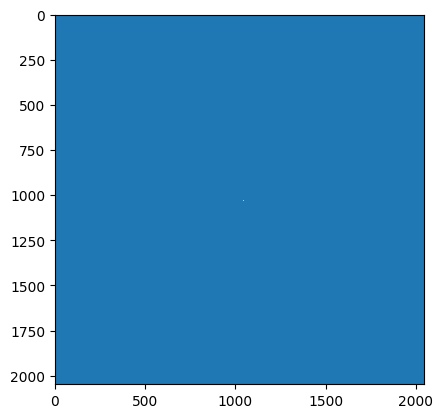

In [11]:
colours = ["r", "g", "b", "y", "m", "c", "k"]

# Plot the clusters
clusters_img = np.zeros(hot_pixels.shape)
for i, d in enumerate(data):
    print(i, d)
    clusters_img[int(d[0]), int(d[1])] = labels[i] + 1

plt.imshow(clusters_img, cmap="tab20")


In [35]:
db.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)